In [132]:
# import des modules nécessaires
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import matplotlib.patches as mpatches
from distinctipy import distinctipy
from matplotlib.font_manager import FontProperties
from matplotlib import rc
import numpy as np
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import ipywidgets as widgets
from IPython.display import clear_output, display
from scipy.stats import chi2_contingency as chi2_contingency
import statsmodels.formula.api as statsapi
import statsmodels as stats
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import xlrd as xlrd
from matplotlib import font_manager # for mac users
import platform
import os
from sklearn.decomposition import PCA

# Modifier les paramètres d'affichage de la sortie des commandes dans Jupyter
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 100)

# Pour lister les polices présentes
#fpaths = matplotlib.font_manager.findSystemFonts()
#for i in fpaths:
#    f = matplotlib.font_manager.get_font(i)
#    print(f.family_name)
# import de la police Garamond

system = platform.system()
print(system)
if system == 'Darwin':  # macOS
  font_path = '/Library/Fonts/GaramondPremrPro.otf'
elif system == 'Windows':
  font_path = 'C:/Windows/Fonts/Garamond.TTF'
else:  #  unix
  font_path = 'GARA.TTF'
print(font_path)

garamond_font = FontProperties(fname="/Library/Fonts/GaramondPremrPro.otf",size=14) # for MAC
garamond_font = FontProperties(fname="/Library/Fonts/Garamond.otf",size=14) # for WINDOWS

#    timesnewroman_font = FontProperties(fname="C:/Windows/Fonts/TIMES.TTF",size=14)

font_manager.findSystemFonts(fontpaths=font_path, fontext="ttf")
font_manager.findfont("Garamond Premier Pro") 

# Définissez la police par défaut pour toute la figure
matplotlib.rcParams['font.family'] = 'Garamond'

Windows
C:/Windows/Fonts/Garamond.TTF


<H1>Projet 3</H1
<H3> Les données sur la consommation d'essence </H3>

In [143]:
# Chargement des données AUTO MPG
df_autompg = pd.read_table("input/mlsupervise/auto-mpg-data.csv",sep=",")

# verif données
print(df_autompg.info())

# transtypage numerique de la colonne horsepower sur les 4 jeux de données
df_autompg['horsepower'] = pd.to_numeric(df_autompg.horsepower, errors='coerce')

# verif si df_autompg contient des NaN
df_autompg.dropna(inplace=True)

# verification du nouveau type
print(df_autompg.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           396 non-null    float64
 1   cylinders     396 non-null    int64  
 2   displacement  396 non-null    int64  
 3   horsepower    396 non-null    object 
 4   weight        396 non-null    int64  
 5   acceleration  396 non-null    float64
 6   model year    396 non-null    int64  
 7   origin        396 non-null    int64  
 8   car name      396 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 28.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 395
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    int64  
 3   horsepower    392 non-null    f

Projet 2. La consommation d'essence

In [149]:
# Jeu d'entrainement, 80% des données

# import des librairies
from sklearn.model_selection import train_test_split
y=pd.DataFrame()
y["mpg"]=df_autompg["mpg"]
#print("y :\n", y.head(5))
X=df_autompg.drop(columns={"mpg","car name"})
#print("X:\n",X.iloc[:,0:7].head(5))


# Split du jeu de données
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=1, shuffle=False, stratify=None)

print("X_train ", X_train.shape)
print("X_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)


X_train  (313, 7)
X_test  (79, 7)
y_train  (313, 1)
y_test  (79, 1)


In [150]:
import sklearn
from sklearn import tree
#from sklearn.tree import tree
from sklearn.tree import DecisionTreeRegressor

# Entrainement d'un modèle de Classifier et de X_train, y_train

dt = DecisionTreeRegressor(criterion="squared_error",splitter="best",max_depth=8, min_samples_leaf=0.13)
dt = dt.fit(X_train, y_train)

# Prédiction à l'aide du modèle et de X_test et y_test
#y_pred=dt.predict(X_test_temp)
#print("Prédiction:\n",y_pred[0:10]) # affichage de la prediction
#print("y_test:\n", y_test.iloc[0:10]) # affichage de la réalité y_test pour comparaison avec la prediction

['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model year', 'origin', 'car name']


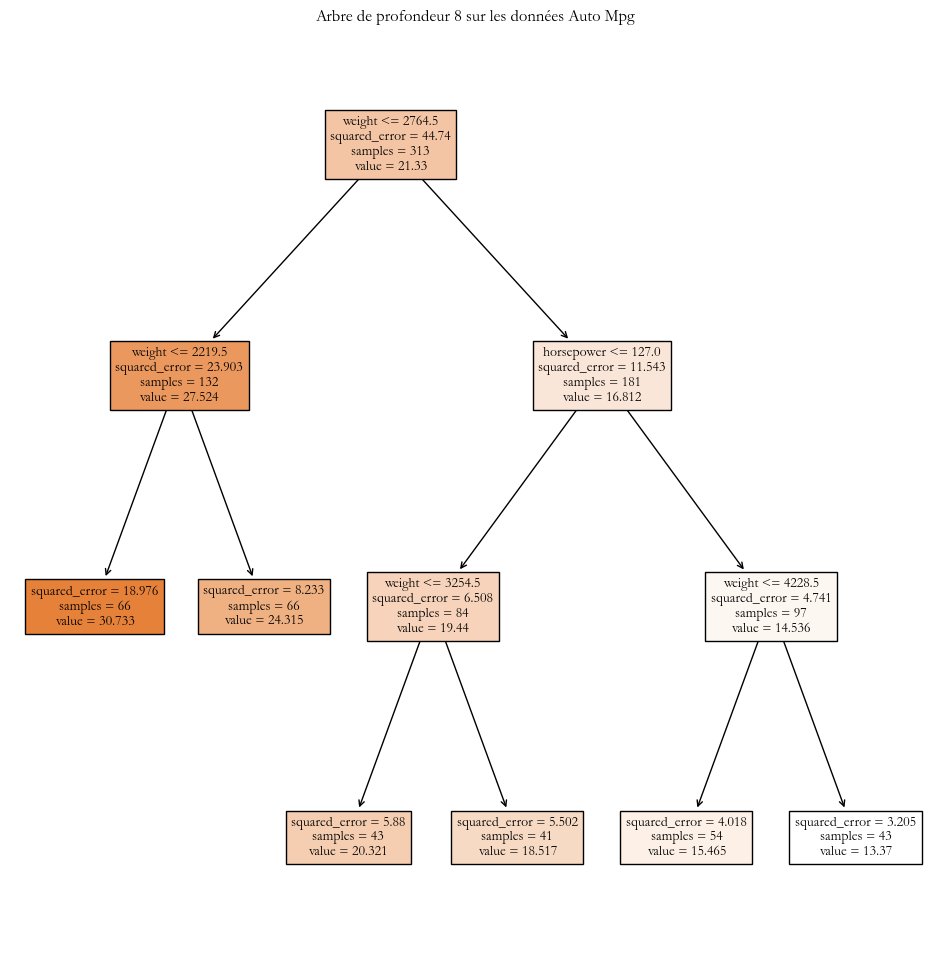

In [159]:
# afficher l'arbre de regression

feature_names=["cylinders","displacement","horsepower","weight","acceleration","model year","origin","car name"]
print(feature_names)

# Affichage de l'Arbre
fig = plt.figure(figsize=(12,12))
#plt.plot(X_test, y_test, color="cornflowerblue", label="max_depth=8", linewidth=2)
tree.plot_tree(dt,filled=True, feature_names=feature_names,fontsize=10)
plt.title("Arbre de profondeur 8 sur les données Auto Mpg")
plt.show()

<H3>Projet 2. Exercice 2. Point 1. </H3>

In [160]:
# Prédiction y_pred à l'aide du modèle dt et de X_test

y_pred=dt.predict(X_test)
#print("Prédiction:\n",y_pred[0:10]) # affichage de la prediction
#print("y_test:\n", y_test.iloc[0:10]) # affichage de la réalité y_test pour comparaison avec la prediction

# import librairie
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# Calcul du MAE
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute error: ", round(mae,2))

# Calcul du MSE
mse = mean_squared_error(y_test,y_pred)
print("Mean squared error: ", round(mse,2))

# Calcul du RMSE
rmse = np.sqrt(mse)
print("Square root Mean squared error: ", round(rmse,2))

Mean absolute error:  6.41
Mean squared error:  59.62
Square root Mean squared error:  7.72


In [161]:
# Prediction sur le jeu de données d'entrainement X_train
y_pred_train=dt.predict(X_train)

# Calcul du MAE
mae = mean_absolute_error(y_train,y_pred_train)
print("Mean absolute error: ", round(mae,2))

# Calcul du MSE sur le jeu de données y_pred_train y_train
mse_train = mean_squared_error(y_train,y_pred_train)
print("Mean squared error: ", round(mse_train,2))

# Calcul du RMSE
rmse_train = np.sqrt(mse_train)
print("Square root Mean squared error: ", round(rmse_train,2))




Mean absolute error:  2.16
Mean squared error:  8.4
Square root Mean squared error:  2.9


In [163]:
# RMSE de validation et d'entrainement pour des jeux de données croissants
# Série de modèle sur des données de 10% à 80% des données disponibles

# Jeux de données de 10% à 80% des données disponibles
# Split du jeu de données
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.1, random_state=1, shuffle=False, stratify=None)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X,y, test_size=0.2, random_state=1, shuffle=False, stratify=None)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X,y, test_size=0.3, random_state=1, shuffle=False, stratify=None)
X_train4, X_test4, y_train4, y_test4 = train_test_split(X,y, test_size=0.4, random_state=1, shuffle=False, stratify=None)
X_train5, X_test5, y_train5, y_test5 = train_test_split(X,y, test_size=0.5, random_state=1, shuffle=False, stratify=None)
X_train6, X_test6, y_train6, y_test6 = train_test_split(X,y, test_size=0.6, random_state=1, shuffle=False, stratify=None)
X_train7, X_test7, y_train7, y_test7 = train_test_split(X,y, test_size=0.7, random_state=1, shuffle=False, stratify=None)
X_train8, X_test8, y_train8, y_test8 = train_test_split(X,y, test_size=0.8, random_state=1, shuffle=False, stratify=None)


In [164]:
# Entrainement des modèles dt1 à dt8
dt1 = dt.fit(X_train1, y_train1)
dt2 = dt.fit(X_train2, y_train2)
dt3 = dt.fit(X_train3, y_train3)
dt4 = dt.fit(X_train4, y_train4)
dt5 = dt.fit(X_train5, y_train5)
dt6 = dt.fit(X_train6, y_train6)
dt7 = dt.fit(X_train7, y_train7)
dt8 = dt.fit(X_train8, y_train8)


In [175]:
# Prédiction sur les données de test

df_predictions_test = pd.DataFrame

y_pred_test1 = dt1.predict(X_test1)
y_pred_test2 = dt2.predict(X_test2)
y_pred_test3 = dt3.predict(X_test3)
y_pred_test4 = dt4.predict(X_test4)
y_pred_test5 = dt5.predict(X_test5)
y_pred_test6 = dt6.predict(X_test6)
y_pred_test7 = dt7.predict(X_test7)
y_pred_test8 = dt8.predict(X_test8)

In [178]:
# Prédiction sur les données d'entrainement
y_pred_train1 = dt1.predict(X_train1)
y_pred_train2 = dt2.predict(X_train2)
y_pred_train3 = dt3.predict(X_train3)
y_pred_train4 = dt4.predict(X_train4)
y_pred_train5 = dt5.predict(X_train5)
y_pred_train6 = dt6.predict(X_train6)
y_pred_train7 = dt7.predict(X_train7)
y_pred_train8 = dt8.predict(X_train8)



In [179]:
# Affichage des RMSE de validation et d'entrainement pour les différents jeux de données

# calcul des rmse sur les données de validation
rmse_test_1 = np.sqrt(mean_squared_error(y_test1,y_pred_test1))
rmse_test_2 = np.sqrt(mean_squared_error(y_test2,y_pred_test2))
rmse_test_3 = np.sqrt(mean_squared_error(y_test3,y_pred_test3))
rmse_test_4 = np.sqrt(mean_squared_error(y_test4,y_pred_test4))
rmse_test_5 = np.sqrt(mean_squared_error(y_test5,y_pred_test5))
rmse_test_6 = np.sqrt(mean_squared_error(y_test6,y_pred_test6))
rmse_test_7 = np.sqrt(mean_squared_error(y_test7,y_pred_test7))
rmse_test_8 = np.sqrt(mean_squared_error(y_test8,y_pred_test8))

# calcul des rmse sur les données d'entrainement
rmse_train_1 = np.sqrt(mean_squared_error(y_train1,y_pred_train1))
rmse_train_2 = np.sqrt(mean_squared_error(y_train2,y_pred_train2))
rmse_train_3 = np.sqrt(mean_squared_error(y_train3,y_pred_train3))
rmse_train_4 = np.sqrt(mean_squared_error(y_train4,y_pred_train4))
rmse_train_5 = np.sqrt(mean_squared_error(y_train5,y_pred_train5))
rmse_train_6 = np.sqrt(mean_squared_error(y_train6,y_pred_train6))
rmse_train_7 = np.sqrt(mean_squared_error(y_train7,y_pred_train7))
rmse_train_8 = np.sqrt(mean_squared_error(y_train8,y_pred_train8))





In [189]:
# remplissage de deux tableaux avec les données
tablo_validation = [rmse_test_1,
                    rmse_test_2,
                    rmse_test_3,
                    rmse_test_4,
                    rmse_test_5,
                    rmse_test_6,
                    rmse_test_7,
                    rmse_test_8]

# remplissage de deux tableaux avec les données
tablo_entrainement = [  rmse_train_1,
                        rmse_train_2,
                        rmse_train_3,
                        rmse_train_4,
                        rmse_train_5,
                        rmse_train_6,
                        rmse_train_7,
                        rmse_train_8]


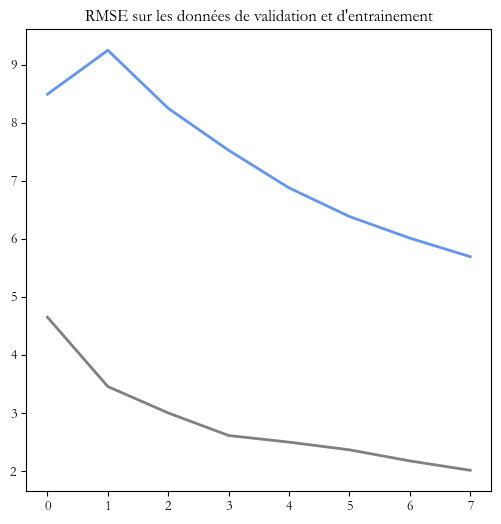

In [193]:
# Affichage bar plot des deux courbes
fig = plt.figure(figsize=(6,6))
plt.plot(tablo_validation, color="cornflowerblue", label="Données de validation", linewidth=2)
plt.plot(tablo_entrainement, color="grey", label="Données d'entrainement", linewidth=2)
plt.title("RMSE sur les données de validation et d'entrainement")
plt.show()
